In [1]:
%matplotlib inline

from random import randint,seed

from enum import Enum

import matplotlib.pyplot as plt

In [2]:
class Strategie(Enum):
    CHANGER=1
    GARDER=2

In [3]:
def play_game(strategie):
    
    portes=[0,1,2]
    bonne_porte=randint(0,2)
    premier_choix=randint(0,2)
    portes.remove(premier_choix)
    
    if premier_choix==bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes=[bonne_porte]
    
    deuxieme_choix=0
    if strategie ==Strategie.CHANGER:
        deuxieme_choix=portes[0]
    elif strategie==Strategie.GARDER:
        deuxieme_choix=premier_choix
    else:
        raise ValueError("Stratégie non reconnue")
        
    return deuxieme_choix==bonne_porte
    

In [4]:
print(play_game(Strategie.CHANGER))

True


In [5]:
def play(strategie,nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [6]:
results=play(Strategie.CHANGER,10000)
print(sum(results))

results=play(Strategie.GARDER,10000)
print(sum(results))

6691
3306


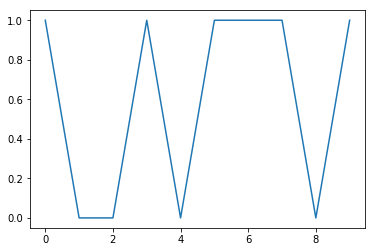

In [7]:
plot=plt.plot(play(Strategie.GARDER,10))

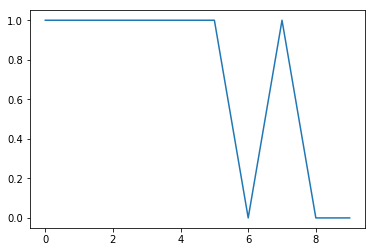

In [8]:
plot=plt.plot(play(Strategie.CHANGER,10))

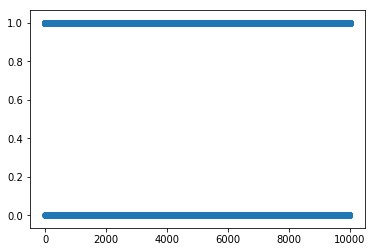

In [9]:
plot=plt.scatter(range(10000),play(Strategie.CHANGER,10000))

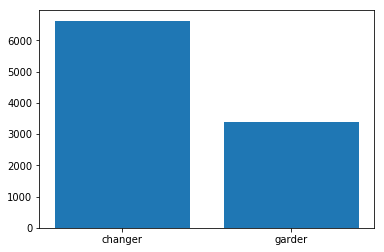

In [10]:
plot=plt.bar([1,2],[sum(play(Strategie.CHANGER,10000)),sum(play(Strategie.GARDER,10000))],tick_label=['changer','garder'])

In [11]:
gains_changer=[]
gains_garder=[]
samples=[1000,10000,20000,50000,80000,100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER,tours))
    gains_garder.append(play(Strategie.GARDER,tours))

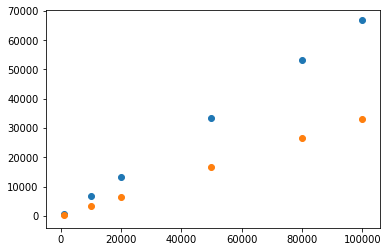

In [12]:
figure=plt.figure()
plot=plt.scatter(samples,[sum(x) for x in gains_changer])
plot=plt.scatter(samples,[sum(x) for x in gains_garder])

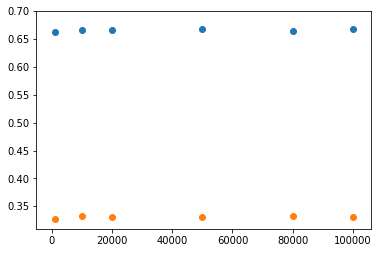

In [15]:
plot=plt.scatter(samples,[sum(x)/len(x) for x in gains_changer])
plot=plt.scatter(samples,[sum(x)/len(x) for x in gains_garder])